## **Generate Dataset**

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## **STEP 1 — Dataset Design & Feature Justification**

## distance(in Km)
**Distance represents how far the passenger travels in kilometers. Longer distances generally require more fuel and time, which directly increases the ride price. Therefore, distance is a core factor in pricing**
## duration(in min)
**Trip duration measures how long the ride takes in minutes. Longer trips occupy the driver for more time and increase operational cost, which leads to higher price**

## traffic_level
**Traffic level describes road congestion (low, medium, or high). High traffic causes delays and increased fuel usage, which increases ride price**

## time_of_day
**Time of day captures peak and off-peak periods. Rides during morning and evening rush hours or late night often cost more due to higher demand and limited availability**

## weather
**Weather conditions such as rain or fog make driving more difficult and risky. These conditions often lead to higher prices to compensate drivers**

## demand_level
**Demand level represents how many people are requesting rides. When demand is high, prices increase due to surge pricing mechanisms**

## ride_price (Target Variable)
**Ride price is the continuous target variable that the model learns to predict based on trip and contextual features**

## Feature Not Included
**Driver rating was considered but excluded because it does not directly affect the base price calculation of a ride**

In [124]:

np.random.seed(42)

rows = 200

data = []

for _ in range(rows):
    distance = round(np.random.uniform(1, 25), 2)
    duration = np.random.randint(5, 60)
    time_of_day = np.random.choice(["Morning", "Afternoon", "Evening", "Night"])
    traffic = np.random.choice(["Low", "Medium", "High"])
    weather = np.random.choice(["Clear", "Rainy", "Foggy"])
    demand = np.random.choice([1, 2, 3])

    price = (
        2
        + distance * 1.5
        + duration * 0.3
        + demand * 2
    )

    if traffic == "High":
        price += 3
    elif traffic == "Medium":
        price += 1.5

    if weather == "Rainy":
        price += 2
    elif weather == "Foggy":
        price += 1

    price += np.random.normal(0, 1)   # noise
    price = round(price, 2)

    data.append([
        distance, duration, time_of_day,
        traffic, weather, demand, price
    ])

columns = [
    "distance_km",
    "duration_min",
    "time_of_day",
    "traffic_level",
    "weather",
    "demand_level",
    "ride_price"
]

df = pd.DataFrame(data, columns=columns)

df.head()

,distance_km,duration_min,time_of_day,traffic_level,weather,demand_level,ride_price
0,9.99,33,Evening,High,Clear,1,31.65
1,2.39,28,Morning,High,Rainy,1,20.75
2,24.28,48,Afternoon,Medium,Rainy,1,59.78
3,1.17,29,Morning,High,Foggy,3,23.99
4,4.35,32,Night,High,Rainy,2,26.50


## **A synthetic dataset with 200 rows and 7 columns was generated. The dataset contains both numerical and categorical features and satisfies all minimum project requirements. Random noise was added to make the data more realistic**

## **Save Dataset as CSV**

In [125]:
df.to_csv("rides.csv", index=False)


In [126]:
df.shape

(200, 7)

##**Data Exploration and Understanding(EDA)**

In [127]:
df = pd.read_csv("rides.csv")
df.head()

,distance_km,duration_min,time_of_day,traffic_level,weather,demand_level,ride_price
0,9.99,33,Evening,High,Clear,1,31.65
1,2.39,28,Morning,High,Rainy,1,20.75
2,24.28,48,Afternoon,Medium,Rainy,1,59.78
3,1.17,29,Morning,High,Foggy,3,23.99
4,4.35,32,Night,High,Rainy,2,26.50


**The first few rows show realistic values for distance, duration, and ride price. Categorical features contain meaningful labels such as Morning, High, and Rainy**

## **Check Dataset Size and Columns**
**This tells Number of rows, columnn types, missing values**

In [128]:
df.shape

(200, 7)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance_km    200 non-null    float64
 1   duration_min   200 non-null    int64  
 2   time_of_day    200 non-null    object 
 3   traffic_level  200 non-null    object 
 4   weather        200 non-null    object 
 5   demand_level   200 non-null    int64  
 6   ride_price     200 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.1+ KB


**The dataset contains 200 entries and no missing values. Data types are correctly assigned**

## **Check Missing Values**

In [130]:
df.isnull().sum()

,0
distance_km,0
duration_min,0
time_of_day,0
traffic_level,0
weather,0
demand_level,0
ride_price,0


In [131]:
df.describe()

,distance_km,duration_min,demand_level,ride_price
count,200.00000,200.000000,200.000000,200.000000
mean,13.56385,32.630000,2.010000,38.699250
std,7.04879,15.761192,0.820528,11.944495
min,1.13000,5.000000,1.000000,13.640000
25%,7.65750,18.750000,1.000000,30.177500
50%,13.74000,32.500000,2.000000,39.055000
75%,20.07000,44.250000,3.000000,47.017500
max,24.95000,59.000000,3.000000,65.280000


**Numerical features show reasonable ranges and no unrealistic values**

## **Check Categorical Distirbutions**

In [132]:
df["time_of_day"].value_counts()
df["traffic_level"].value_counts()
df["weather"].value_counts()

,count
weather,
Rainy,73
Foggy,71
Clear,56


## **Visualization(let's visualize how distance relates to price)**

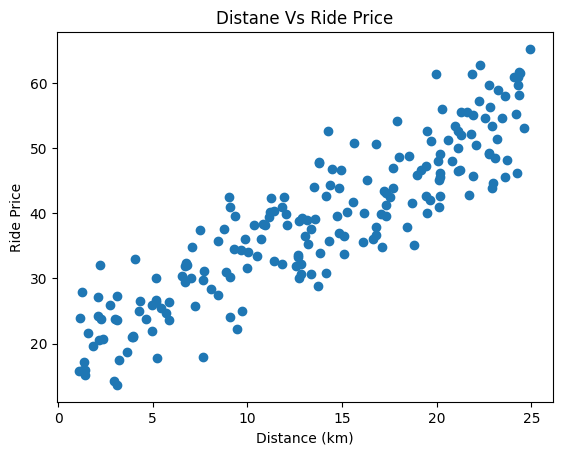

In [133]:
plt.scatter(df["distance_km"], df["ride_price"])
plt.xlabel("Distance (km)")
plt.ylabel("Ride Price")
plt.title("Distane Vs Ride Price")
plt.show()

**The scatter plot shows a positive relationship between distance and ride price, meaning that longer distances generally lead to higher prices**

**The above dataset contains 200 rows and 7 columns with no missing values. Numerical features show reasonable ranges. Visualization shows a positive relationship between distance and ride price, confirming realistic behavior**

## **Identify Potential Outliers**

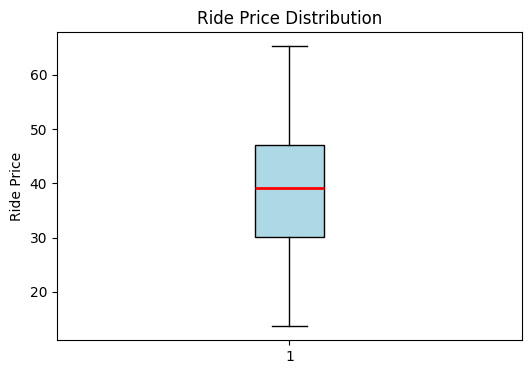

In [134]:
plt.figure(figsize=(6,4))

plt.boxplot(
    df["ride_price"],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue"),
    medianprops=dict(color="red", linewidth=2),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6)
)

plt.title("Ride Price Distribution")
plt.ylabel("Ride Price")
plt.show()

## **What Each Color Represents**
🔵 Light Blue Box

Shows the middle 50% of ride prices (between 25th and 75th percentile)

Most common price range

🔴 Red Line (Inside Box)

The median (middle) price

Half of rides cost below this value, half above

⚫ Black Whiskers

Show the normal minimum and maximum range of prices

🟠 Orange Dots

Outliers

Prices that are unusually low or unusually high

## **step R - Data Cleaning and Feature Engineering**


**1. Handle Missing Values**

In [135]:
df.isnull().sum()

,0
distance_km,0
duration_min,0
time_of_day,0
traffic_level,0
weather,0
demand_level,0
ride_price,0


**Missing values can distort or reduce model accuracy**

In [136]:
df.fillna(df.median(numeric_only=True), inplace=True)

**2. Encode Categorical Variables, it requires numbers not text**

In [137]:
df_encoded = pd.get_dummies(
    df,
    columns=["time_of_day", "traffic_level", "weather"],
    drop_first=True
)



In [138]:
df_encoded.head()


,distance_km,duration_min,demand_level,ride_price,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,traffic_level_Low,traffic_level_Medium,weather_Foggy,weather_Rainy
0,9.99,33,1,31.65,True,False,False,False,False,False,False
1,2.39,28,1,20.75,False,True,False,False,False,False,True
2,24.28,48,1,59.78,False,False,False,False,True,False,True
3,1.17,29,3,23.99,False,True,False,False,False,True,False
4,4.35,32,2,26.50,False,False,True,False,False,False,True


**3. Feature Scaling**

In [139]:
scaler = StandardScaler()
num_cols = ["distance_km", "duration_min", "demand_level"]
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

**Prevents large numbers dominating small ones**

**Outlier Treatment(using IQR method)**

In [140]:
Q1 = df_encoded["ride_price"].quantile(0.25)
Q3 = df_encoded["ride_price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_encoded = df_encoded[
    (df_encoded["ride_price"] >= lower) &
    (df_encoded["ride_price"] <= upper)
]


**Encoding transforms categorical values into numeric form. Scaling ensures fair contribution of features. Outliers can bias regression lines and cause unstable predictions**

##  **Separate X and y**

In [141]:
X = df_encoded.drop("ride_price", axis=1)
y = df_encoded["ride_price"]

## **Step 5 - Regression Model(Price Prediction)**

**Predict the exact ride price**

In [142]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**80% training, 20% testing**

**Train Linear Regression Model**

In [143]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

**Make Predictions**

In [144]:
y_pred = lr_model.predict(X_test)


**Evaluate Model, using Mean Absolute Error(MAE)**

In [145]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.7177082422759369


**The Mean Absolute Error indicates the average difference between predicted and actual ride prices. A low MAE suggests that the model predicts prices reasonably well**

# Plot Predicted Vs Actual

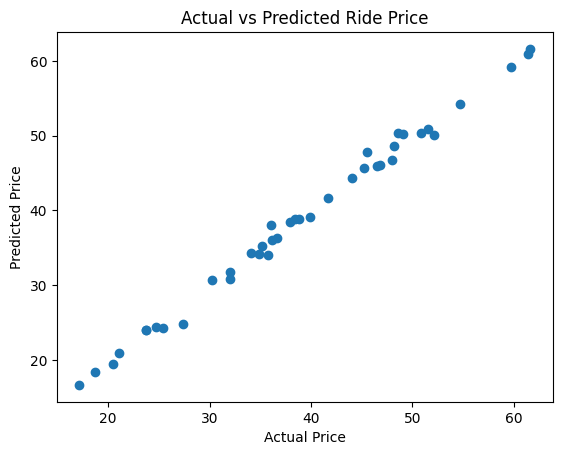

In [146]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Ride Price")
plt.show()


**Most predicted values are close to actual values, showing that the model captures important pricing patterns**

**Linear Regression learns a linear relationship between input features and ride price. MAE shows average prediction error in currency units**

## **Step 6 - Classfication(High-Cost Vs Low-Cost)**

**High cost -> Price above median**
**Low cost -> Price below or equal median**

In [147]:
median_price = df_encoded["ride_price"].median()

df_encoded["high_cost"] = (df_encoded["ride_price"] > median_price).astype(int)


**New X and y**

In [148]:
X_class = df_encoded.drop(["ride_price", "high_cost"], axis=1)
y_class = df_encoded["high_cost"]


**Train-Test Split**

In [149]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)


**Train Logistic Regression**

In [150]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_c, y_train_c)

LogisticRegression(max_iter=1000)

**Predict**

In [151]:
y_pred_c = log_model.predict(X_test_c)


**Accuracy**

In [152]:
acc = accuracy_score(y_test_c, y_pred_c)
print("Accuracy: ", acc)

Accuracy:  0.95


**The classification model achieves good accuracy in distinguishing high-cost and low-cost rides**

**Confusion Matrix**
**format**
**[[TN FP]
 [FN TP]]**



**The confusion matrix shows how many rides were correctly and incorrectly classified**

In [153]:
cm = confusion_matrix(y_test_c, y_pred_c)
print(cm)

[[20  2]
 [ 0 18]]


**Probablity Output**

In [154]:
log_model.predict_proba(X_test_c)[:5]


array([[7.42213236e-01, 2.57786764e-01],
       [6.38472043e-01, 3.61527957e-01],
       [9.45650912e-01, 5.43490880e-02],
       [2.41987301e-04, 9.99758013e-01],
       [3.96489441e-02, 9.60351056e-01]])

**The above returns probablity of [low_cost, high_cost]**

**Logistic Regression outputs probabilities between 0 and 1. If probability > 0.5, model predicts high-cost**

## **Step 7 - Model Evaluation and Comparison**

**Regression: predicts exact price and Metric: MAE**


**Classification: predicts category(high/low) and Metric: Accuracy**

**Regression provides precise price estimates, while classification simplifies pricing into categories**

**Check coefficients from Linear Regression(Most Infulential Feature)**

**Top Feature is most influential**

In [155]:
importance = pd.Series(
    lr_model.coef_,
    index=X.columns
).sort_values(ascending=False)

importance.head()


,0
distance_km,10.536817
duration_min,4.655470
weather_Rainy,2.264630
demand_level,1.640488
weather_Foggy,1.183238


**Distance and duration have the largest impact on ride price, which aligns with real-world expectations**

## **Step 8 - Ethical And Practical Reglection**
###**1 Unfair Pricing Behavior**
  **The model may unintentionally charge higher prices in certain areas or times, leading to unfair treatment of specific user groups**

### **2 Real-World Risk**
   **Incorrect predictions could overcharge customers or underpay drivers.**

### **3 Dataset Limitation**
 **The dataset is synthetic and may not capture all real-world factors**
   